In [213]:
# Dependencies and Setup
import csv
import os
import matplotlib.pyplot as plt
import hvplot.pandas
import datetime as dt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress

In [214]:
# Load the CSV Heart Disease Mortality by State into a Pandas DataFrame file
mortality1_df = pd.read_csv("Resources/Heart Disease Mortality by State data-table.csv")

# Display sample raw data before cleaning
mortality_df

,YEAR,STATE,RATE,DEATHS
50,2019,AL,219.6,13448
51,2019,AK,129.7,843
52,2019,AZ,134.0,12587
53,2019,AR,226.5,8669
54,2019,CA,136.9,62394
55,2019,CO,127.7,7762
56,2019,CT,143.1,7354
57,2019,DE,154.3,2053
58,2019,FL,140.1,47144
59,2019,GA,175.5,19543


In [215]:
## Cleaning Heart Disease Mortality by State

# Deleting URL column
#mortality_df = mortality_df.drop(['URL'], axis=1)

# Filtering Year Column by looping thru YEAR column to get Year 2019 only
year = [2019]

for year in year:
    mortality_df = mortality_df.loc[mortality_df["YEAR"] == year, :]
#mortality_df

# Copying data frame to list to change the Column Header titles 
mortality = mortality_df.copy()

heart_mortality_df = pd.DataFrame({"Year": mortality["YEAR"],
                                    "State":mortality["STATE"],
                                    "Rate": mortality["RATE"],
                                    "Deaths": mortality["DEATHS"]
                                    })

# Creating a Dictionary of States Abbreviation to State name
states = {
    "AL" : "Alabama",
    "AK" : "Alaska",
    "AZ" : "Arizona",
    "AR" : "Arkansas",
    "CA" : "California",
    "CO" : "Colorado",
    "CT" : "Connecticut",
    "DE" : "Delaware",
    "FL" : "Florida" ,
    "GA" : "Georgia",
    "HI" : "Hawaii",
    "ID" : "Idaho",
    "IL" : "Illinois",
    "IN" : "Indiana",
    "IA" : "Iowa",
    "KS" : "Kansas",
    "KY" : "Kentucky",
    "LA" : "Louisiana",
    "ME" : "Maine",
    "MD" : "Maryland",
    "MA" : "Massachusetts",
    "MI" : "Michigan",
    "MN" : "Minnesota",
    "MS" : "Mississippi",
    "MO" : "Missouri",
    "MT" : "Montana",
    "NE" : "Nebraska",
    "NV" : "Nevada",
    "NH" : "New Hampshire",
    "NJ" : "New Jersey",
    "NM" : "New Mexico",
    "NY" : "New York",
    "NC" : "North Carolina",
    "ND" : "North Dakota",
    "OH" : "Ohio",
    "OK" : "Oklahoma",
    "OR" : "Oregon",
    "PA" : "Pennsylvania",
    "RI" : "Rhode Island",
    "SC" : "South Carolina",
    "SD" : "South Dakota",
    "TN" : "Tennessee",
    "TX" : "Texas",
    "UT" : "Utah",
    "VT" : "Vermont",
    "VA" : "Virginia",
    "WA" : "Washington",
    "WV" : "West Virginia",
    "WI" : "Wisconsin",
    "WY" : "Wyoming",
    "DC" : "District of Columbia",
    "AS" : "American Samoa",
    "GU" : "Guam",
    "MP" : "Northern Mariana Islands",
    "PR" : "Puerto Rico",
    "UM" : "United States Minor Outlying Islands",
    "VI" : "U.S. Virgin Islands"
}
    
# Using .replace to replace State Abbreviation with State Name from the dictionary
heart_mortality_df['State'] = heart_mortality_df['State'].replace(states)

# Reseting the index
heart_mortality_df = heart_mortality_df.reset_index(drop=True)

heart_mortality_df['Deaths'] = heart_mortality_df['Deaths'].astype(float)
heart_mortality_df['Rate'] = heart_mortality_df['Rate'].astype(float)

# Print the CLEAN data frame
heart_mortality_df

,Year,State,Rate,Deaths
0,2019,Alabama,219.6,13448.0
1,2019,Alaska,129.7,843.0
2,2019,Arizona,134.0,12587.0
3,2019,Arkansas,226.5,8669.0
4,2019,California,136.9,62394.0
5,2019,Colorado,127.7,7762.0
6,2019,Connecticut,143.1,7354.0
7,2019,Delaware,154.3,2053.0
8,2019,Florida,140.1,47144.0
9,2019,Georgia,175.5,19543.0


In [216]:
# Load the CSV Health Insurance Coverage of the Total Population file into a Pandas DataFrame
insurance_coverage_df = pd.read_csv("Resources/Health Insurance Coverage of the Total Population Count.csv")

# Display sample data before cleaning
insurance_coverage_df

,Title: Health Insurance Coverage of the Total Population | KFF,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Timeframe: 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Location,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes
2,United States,158000000,18728800,63145700,45286700,4393600,29349300,319000000,1
3,Alabama,2250900,263400,929500,763800,99000,460400,4767100,NaN
4,Alaska,339800,24700,149400,70200,37100,80500,701700,NaN
...,...,...,...,...,...,...,...,...,...
98,*N/A*: Estimates with relative standard errors...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
## Cleaning Health Insurance Coverage of the Total Population

# Removing Rows 0,1,2 & 11 which is District of Colmbia state sinc not share with Heart Disease Mortality by State file 
insurance_coverage_df = insurance_coverage_df.drop([0,1,2,11], axis=0)

# Removing all footer notes
insurance_coverage_df = insurance_coverage_df.drop(index=insurance_coverage_df.index[-49:])

# Deleteing unnessarily columns 
# insurance_coverage_df = insurance_coverage_df.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8'], axis=1)

# Copying DF to list & changing Column header title & adding new empty column Insured
ins_cov = insurance_coverage_df.copy()
insurance_coverage_df = pd.DataFrame({"State": ins_cov["Title: Health Insurance Coverage of the Total Population | KFF"],
                                      "Employer":ins_cov['Unnamed: 1'],
                                      "Non-Group":ins_cov['Unnamed: 2'],
                                      "Medicaid":ins_cov['Unnamed: 3'],
                                      "Medicare":ins_cov['Unnamed: 4'],
                                      "Military":ins_cov['Unnamed: 5'],
                                      "Uninsured":ins_cov["Unnamed: 6"],
                                      "Insured": "",
                                      "Total": ins_cov["Unnamed: 7"]
                                    })

# Reseting the index
insurance_coverage_df = insurance_coverage_df.reset_index(drop=True)

# Changing Total & Uninsured colom typt from str to Float & do subtraction to save it to Insured column
insurance_coverage_df['Insured'] = insurance_coverage_df['Total'].astype("float") - insurance_coverage_df['Uninsured'].astype("float")
insurance_coverage_df['Employer'] = insurance_coverage_df['Employer'].astype("float")
insurance_coverage_df['Non-Group'] = insurance_coverage_df['Non-Group'].astype("float")
insurance_coverage_df['Medicaid'] = insurance_coverage_df['Medicaid'].astype("float")
insurance_coverage_df['Medicare'] = insurance_coverage_df['Medicare'].astype("float")
insurance_coverage_df['Military'] = insurance_coverage_df['Military'].astype("float")
# Print the CLEAN data frame
insurance_coverage_df

,State,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Insured,Total
0,Alabama,2250900.0,263400.0,929500.0,763800.0,99000.0,460400,4306700.0,4767100
1,Alaska,339800.0,24700.0,149400.0,70200.0,37100.0,80500,621200.0,701700
2,Arizona,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100,6308900.0,7098000
3,Arkansas,1226300.0,157300.0,767000.0,464200.0,41800.0,265800,2656700.0,2922500
4,California,18538700.0,2569600.0,9790000.0,4388900.0,350200.0,3005400,35637300.0,38642700
5,Colorado,2997100.0,389900.0,942300.0,718500.0,127200.0,436700,5175100.0,5611800
6,Connecticut,1827200.0,165900.0,743900.0,488000.0,23900.0,204500,3248800.0,3453300
7,Delaware,467700.0,38900.0,191400.0,162500.0,17300.0,62500,877800.0,940300
8,Florida,8454200.0,1995300.0,3643200.0,3776000.0,366300.0,2757000,18235000.0,20992000
9,Georgia,5037600.0,575200.0,1777600.0,1296300.0,228300.0,1379000,8915000.0,10294000


In [218]:
# Load the CSV Health Insurance Coverage of the Total Population % file into a Pandas DataFrame
insurance_coverage_p_df = pd.read_csv("Resources/Health Insurance Coverage of the Total Population raw data %.csv")

# Display sample data before cleaning
insurance_coverage_p_df

,Title: Health Insurance Coverage of the Total Population | KFF,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Timeframe: 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Location,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Total,Footnotes
2,United States,0.496,0.059,0.198,0.142,0.014,0.092,1,1
3,Alabama,0.472,0.055,0.195,0.16,0.021,0.097,1,NaN
4,Alaska,0.484,0.035,0.213,0.1,0.053,0.115,1,NaN
...,...,...,...,...,...,...,...,...,...
98,*N/A*: Estimates with relative standard errors...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
## Cleaning Health Insurance Coverage of the Total Population %

# Removing Rows 0,1,2 & 11 which is District of Colmbia state sinc not share with Heart Disease Mortality by State file 
insurance_coverage_p_df = insurance_coverage_p_df.drop([0,1,2,11], axis=0)

# Removing all footer notes
insurance_coverage_p_df = insurance_coverage_p_df.drop(index=insurance_coverage_p_df.index[-49:])

# Deleteing unnessarily columns 
# insurance_coverage_df = insurance_coverage_df.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8'], axis=1)

# Copying DF to list & changing Column header title & adding new empty column Insured
ins_cov_p = insurance_coverage_p_df.copy()
insurance_coverage_p_df = pd.DataFrame({"State": ins_cov_p["Title: Health Insurance Coverage of the Total Population | KFF"],
                                      "Employer":ins_cov_p['Unnamed: 1'],
                                      "Non-Group":ins_cov_p['Unnamed: 2'],
                                      "Medicaid":ins_cov_p['Unnamed: 3'],
                                      "Medicare":ins_cov_p['Unnamed: 4'],
                                      "Military":ins_cov_p['Unnamed: 5'],
                                      "Uninsured":ins_cov_p["Unnamed: 6"],
                                      "Insured": "",
                                      "Total": ins_cov_p["Unnamed: 7"]
                                    })

# Reseting the index
insurance_coverage_p_df = insurance_coverage_p_df.reset_index(drop=True)

# Changing Total & Uninsured colom typt from str to Float & do subtraction to save it to Insured column
insurance_coverage_p_df['Insured'] = insurance_coverage_p_df['Total'].astype("float") - insurance_coverage_p_df['Uninsured'].astype("float")
insurance_coverage_p_df['Employer'] = insurance_coverage_p_df['Employer'].astype("float")
insurance_coverage_p_df['Non-Group'] = insurance_coverage_p_df['Non-Group'].astype("float")
insurance_coverage_p_df['Medicaid'] = insurance_coverage_p_df['Medicaid'].astype("float")
insurance_coverage_p_df['Medicare'] = insurance_coverage_p_df['Medicare'].astype("float")
insurance_coverage_p_df['Military'] = insurance_coverage_p_df['Military'].astype("float")
# Print the CLEAN data frame
insurance_coverage_p_df

,State,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Insured,Total
0,Alabama,0.472,0.055,0.195,0.160,0.021,0.097,0.903,1
1,Alaska,0.484,0.035,0.213,0.100,0.053,0.115,0.885,1
2,Arizona,0.451,0.052,0.210,0.161,0.015,0.111,0.889,1
3,Arkansas,0.420,0.054,0.262,0.159,0.014,0.091,0.909,1
4,California,0.480,0.066,0.253,0.114,0.009,0.078,0.922,1
5,Colorado,0.534,0.069,0.168,0.128,0.023,0.078,0.922,1
6,Connecticut,0.529,0.048,0.215,0.141,0.007,0.059,0.941,1
7,Delaware,0.497,0.041,0.204,0.173,0.018,0.066,0.934,1
8,Florida,0.403,0.095,0.174,0.180,0.017,0.131,0.869,1
9,Georgia,0.489,0.056,0.173,0.126,0.022,0.134,0.866,1


In [220]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
expenditures_capita_df = pd.read_csv("Resources/Health Care Expenditures per Capita by State of Residence raw_data.csv")

# Display sample data
expenditures_capita_df

,Title: Health Care Expenditures per Capita by State of Residence | KFF,Unnamed: 1
0,Timeframe: 2019,NaN
1,Location,Health Spending per Capita
2,United States,"$9,671"
3,Alabama,"$8,741"
4,Alaska,"$13,226"
...,...,...
62,Sources,NaN
63,"Centers for Medicare & Medicaid Services, Offi...",NaN
64,NaN,NaN
65,Definitions,NaN


In [221]:
## Cleaning Health Care Expenditures per Capita by State

# Removing Rows 0,1,2 & 11 which is District of Colmbia state sinc not share with Heart Disease Mortality by State file 
expenditures_capita_df = expenditures_capita_df.drop([0,1,2,11], axis=0)

# Removing all footer notes
expenditures_capita_df = expenditures_capita_df.drop(index=expenditures_capita_df.index[-13:])

# Copying DF to list & changing Column header title
spend_capita = expenditures_capita_df.copy()
expenditures_capita_df = pd.DataFrame({"State": spend_capita["Title: Health Care Expenditures per Capita by State of Residence | KFF"],
                        "Spending Capita - $Million":spend_capita["Unnamed: 1"]
                        })

# Reseting the index
expenditures_capita_df = expenditures_capita_df.reset_index(drop=True)

## Cleaning Heart Disease Mortality by State

# Filtering Year Column by looping thru YEAR column to get Year 2019 only
year = [2019]

for year in year:
    mortality_df = mortality_df.loc[mortality_df["YEAR"] == year, :]
#mortality_df

# Copying data frame to list to change the Column Header titles 
mortality = mortality_df.copy()

heart_mortality_df = pd.DataFrame({"Year": mortality["YEAR"],
                                    "State":mortality["STATE"],
                                    "Deaths/100k": mortality["RATE"],
                                    "Deaths": mortality["DEATHS"]
                                    })

# Creating a Dictionary of States Abbreviation to State name
states = {
    "AL" : "Alabama",
    "AK" : "Alaska",
    "AZ" : "Arizona",
    "AR" : "Arkansas",
    "CA" : "California",
    "CO" : "Colorado",
    "CT" : "Connecticut",
    "DE" : "Delaware",
    "FL" : "Florida" ,
    "GA" : "Georgia",
    "HI" : "Hawaii",
    "ID" : "Idaho",
    "IL" : "Illinois",
    "IN" : "Indiana",
    "IA" : "Iowa",
    "KS" : "Kansas",
    "KY" : "Kentucky",
    "LA" : "Louisiana",
    "ME" : "Maine",
    "MD" : "Maryland",
    "MA" : "Massachusetts",
    "MI" : "Michigan",
    "MN" : "Minnesota",
    "MS" : "Mississippi",
    "MO" : "Missouri",
    "MT" : "Montana",
    "NE" : "Nebraska",
    "NV" : "Nevada",
    "NH" : "New Hampshire",
    "NJ" : "New Jersey",
    "NM" : "New Mexico",
    "NY" : "New York",
    "NC" : "North Carolina",
    "ND" : "North Dakota",
    "OH" : "Ohio",
    "OK" : "Oklahoma",
    "OR" : "Oregon",
    "PA" : "Pennsylvania",
    "RI" : "Rhode Island",
    "SC" : "South Carolina",
    "SD" : "South Dakota",
    "TN" : "Tennessee",
    "TX" : "Texas",
    "UT" : "Utah",
    "VT" : "Vermont",
    "VA" : "Virginia",
    "WA" : "Washington",
    "WV" : "West Virginia",
    "WI" : "Wisconsin",
    "WY" : "Wyoming",
    "DC" : "District of Columbia",
    "AS" : "American Samoa",
    "GU" : "Guam",
    "MP" : "Northern Mariana Islands",
    "PR" : "Puerto Rico",
    "UM" : "United States Minor Outlying Islands",
    "VI" : "U.S. Virgin Islands"
}
    
# Using .replace to replace State Abbreviation with State Name from the dictionary
heart_mortality_df['State'] = heart_mortality_df['State'].replace(states)

# Reseting the index
heart_mortality_df = heart_mortality_df.reset_index(drop=True)

heart_mortality_df['Deaths/100k'] = heart_mortality_df['Deaths/100k'].astype(float)
heart_mortality_df['Deaths'] = heart_mortality_df['Deaths'].astype(float)


# Print the CLEAN data frame
heart_mortality_df

,Year,State,Deaths/100k,Deaths
0,2019,Alabama,219.6,13448.0
1,2019,Alaska,129.7,843.0
2,2019,Arizona,134.0,12587.0
3,2019,Arkansas,226.5,8669.0
4,2019,California,136.9,62394.0
5,2019,Colorado,127.7,7762.0
6,2019,Connecticut,143.1,7354.0
7,2019,Delaware,154.3,2053.0
8,2019,Florida,140.1,47144.0
9,2019,Georgia,175.5,19543.0


In [224]:
## Merging 

# Merging insurance_coverage_df to heart_mortality_df to expenditures_capita_df on 2 steps
merge1_df = pd.merge(expenditures_capita_df,heart_mortality_df, how="left", on="State")
state_heart_decease_df = pd.merge(merge1_df,insurance_coverage_df, how="left", on="State")
state_heart_decease_df['Spending Capita - $Million'] = state_heart_decease_df['Spending Capita - $Million'].str.replace(',', '').str.replace('$', '').astype(float)

state_heart_decease_df['Deaths/100k'] = state_heart_decease_df['Deaths/100k'].astype(float)
state_heart_decease_df['Employer'] = state_heart_decease_df['Employer'].astype(float)
state_heart_decease_df['Non-Group'] = state_heart_decease_df['Non-Group'].astype(float)
state_heart_decease_df['Medicaid'] = state_heart_decease_df['Medicaid'].astype(float)
state_heart_decease_df['Medicare'] = state_heart_decease_df['Medicare'].astype(float)
state_heart_decease_df['Military'] = state_heart_decease_df['Military'].astype(float)
state_heart_decease_df['Uninsured'] = state_heart_decease_df['Uninsured'].astype(float)
state_heart_decease_df['Insured'] = state_heart_decease_df['Insured'].astype(float)
state_heart_decease_df['Total'] = state_heart_decease_df['Total'].astype(float)
state_heart_decease_df

,State,Spending Capita - $Million,Year,Deaths/100k,Deaths,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Insured,Total
0,Alabama,8741.0,2019,219.6,13448.0,2250900.0,263400.0,929500.0,763800.0,99000.0,460400.0,4306700.0,4767100.0
1,Alaska,13226.0,2019,129.7,843.0,339800.0,24700.0,149400.0,70200.0,37100.0,80500.0,621200.0,701700.0
2,Arizona,8145.0,2019,134.0,12587.0,3202000.0,366500.0,1489600.0,1145300.0,105600.0,789100.0,6308900.0,7098000.0
3,Arkansas,8853.0,2019,226.5,8669.0,1226300.0,157300.0,767000.0,464200.0,41800.0,265800.0,2656700.0,2922500.0
4,California,9628.0,2019,136.9,62394.0,18538700.0,2569600.0,9790000.0,4388900.0,350200.0,3005400.0,35637300.0,38642700.0
5,Colorado,8286.0,2019,127.7,7762.0,2997100.0,389900.0,942300.0,718500.0,127200.0,436700.0,5175100.0,5611800.0
6,Connecticut,11831.0,2019,143.1,7354.0,1827200.0,165900.0,743900.0,488000.0,23900.0,204500.0,3248800.0,3453300.0
7,Delaware,12213.0,2019,154.3,2053.0,467700.0,38900.0,191400.0,162500.0,17300.0,62500.0,877800.0,940300.0
8,Florida,9490.0,2019,140.1,47144.0,8454200.0,1995300.0,3643200.0,3776000.0,366300.0,2757000.0,18235000.0,20992000.0
9,Georgia,8243.0,2019,175.5,19543.0,5037600.0,575200.0,1777600.0,1296300.0,228300.0,1379000.0,8915000.0,10294000.0


In [225]:
#national mean grouping

national_avg_spending = state_heart_decease_df["Spending Capita - $Million"].mean()
national_avg_employer = state_heart_decease_df["Employer"].mean()
national_avg_non_group = state_heart_decease_df["Non-Group"].mean()
national_avg_medicaid = state_heart_decease_df["Medicaid"].mean()
national_avg_military = state_heart_decease_df["Military"].mean()
national_avg_uninsured = state_heart_decease_df["Uninsured"].mean()
national_avg_total = state_heart_decease_df["Total"].mean()
national_avg_deaths_per = state_heart_decease_df["Deaths/100k"].mean()

national_avg_data = pd.DataFrame({"Average Health Spending per Capita" : [national_avg_spending],
                                 "Average Employer Coverage" : [national_avg_employer],
                                 "Average Non-Group Coverage" : [national_avg_non_group],
                                 "Average Medicaid Coverage" : [national_avg_medicaid],
                                 "Average Military Coverage" : [national_avg_military],
                                 "Average Uninsured" : [national_avg_uninsured],
                                 "Average Total Coverage" : [national_avg_total],
                                 "Average Deaths/100k" : [national_avg_deaths_per]})
                                  
national_avg_data

,Average Health Spending per Capita,Average Employer Coverage,Average Non-Group Coverage,Average Medicaid Coverage,Average Military Coverage,Average Uninsured,Average Total Coverage,Average Deaths/100k
0,9860.64,3159540.0,373706.0,1259500.0,87692.0,586498.0,6371556.0,163.688


In [226]:
#national sum grouping

national_sum_spending = state_heart_decease_df["Spending Capita - $Million"].sum()
national_sum_employer = state_heart_decease_df["Employer"].sum()
national_sum_non_group = state_heart_decease_df["Non-Group"].sum()
national_sum_medicaid = state_heart_decease_df["Medicaid"].sum()
national_sum_military = state_heart_decease_df["Military"].sum()
national_sum_uninsured = state_heart_decease_df["Uninsured"].sum()
national_sum_total = state_heart_decease_df["Total"].sum()
national_sum_deaths = state_heart_decease_df["Deaths"].sum()

national_sum_data = pd.DataFrame({"Total Health Spending per Capita" : [national_sum_spending],
                                 "Total Employer Coverage" : [national_sum_employer],
                                 "Total Non-Group Coverage" : [national_sum_non_group],
                                 "Total Medicaid Coverage" : [national_sum_medicaid],
                                 "Total Military Coverage" : [national_sum_military],
                                 "Total Uninsured" : [national_sum_uninsured],
                                 "Total Total Coverage" : [national_sum_total],
                                 "Total Deaths" : [national_sum_deaths]})
national_sum_data

,Total Health Spending per Capita,Total Employer Coverage,Total Non-Group Coverage,Total Medicaid Coverage,Total Military Coverage,Total Uninsured,Total Total Coverage,Total Deaths
0,493032.0,157977000.0,18685300.0,62975000.0,4384600.0,29324900.0,318577800.0,657854.0


In [227]:
# Define a function to create Linear Regression plots
def lnr_fn(x_values, y_values,x_ann,y_ann):
    plt.figure(figsize=(14,10))
    plt.scatter(x_values,y_values,edgecolor="black",alpha=0.80,s=60)
    plt.xlabel(xlabel,size=18)
    plt.ylabel(ylabel,size=18)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    
    plt.plot(x_values,regress_values,"r-")
    
    print(f"The rvalue is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    print(f"The Slope is: {slope}\n"
          f"The Intercept is: {intercept}\n"
          f"The pvalue is: {pvalue}\n"
          f"The Std. Dev. is: {stderr}"
         )
   
    plt.show()    

The rvalue is: 0.8198597883057491
The r-squared is: 0.6721700724807478
The Slope is: 0.012427086342291428
The Intercept is: 5868.618714418762
The pvalue is: 3.2865676551901404e-13
The Std. Dev. is: 0.0012526605772565573


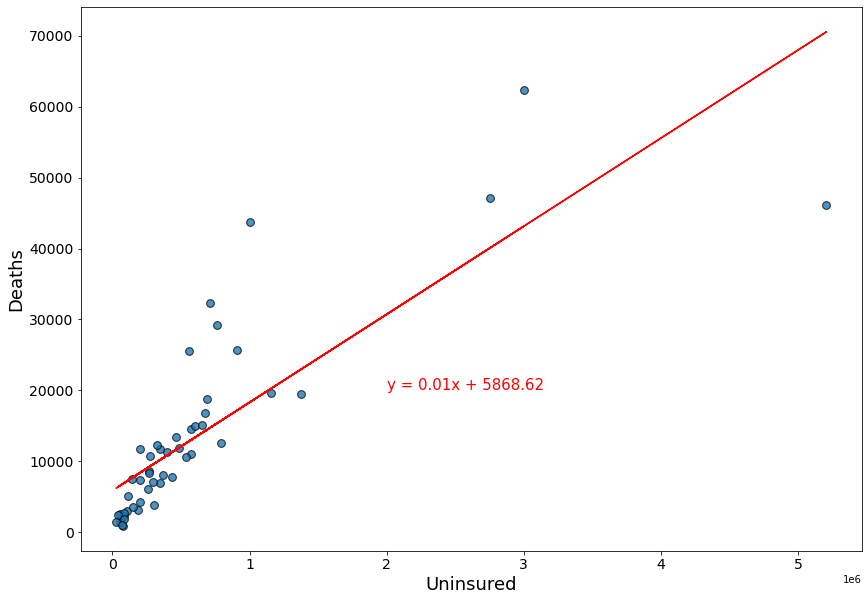

In [228]:
# Linear regression on Uninsured vs Disease Mortaility count
x_values= state_heart_decease_df["Uninsured"]
y_values= state_heart_decease_df["Deaths"]
xlabel='Uninsured'
ylabel='Deaths'
lnr_fn(x_values, y_values,2000000,20000)


The rvalue is: -0.02177222715809732
The r-squared is: 0.0004740298754237906
The Slope is: -7.063021499947853e-07
The Intercept is: 164.10224479836765
The pvalue is: 0.8807041066527801
The Std. Dev. is: 4.681274349827212e-06


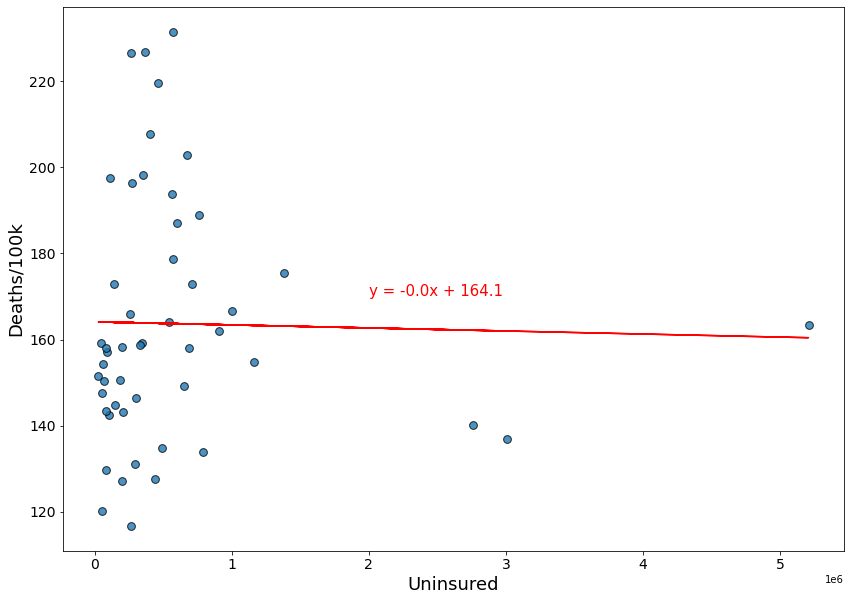

In [229]:
# Linear regression on Uninsured vs Disease Mortaility %
x_values= state_heart_decease_df["Uninsured"]
y_values= state_heart_decease_df["Deaths/100k"]
xlabel='Uninsured'
ylabel='Deaths/100k'
lnr_fn(x_values, y_values,2000000,170)
# Save the figure

The rvalue is: 0.9704110081122994
The r-squared is: 0.9416975246655293
The Slope is: 0.002014977527245087
The Intercept is: 1500.3181361905918
The pvalue is: 2.805779980394661e-31
The Std. Dev. is: 7.236646704072786e-05


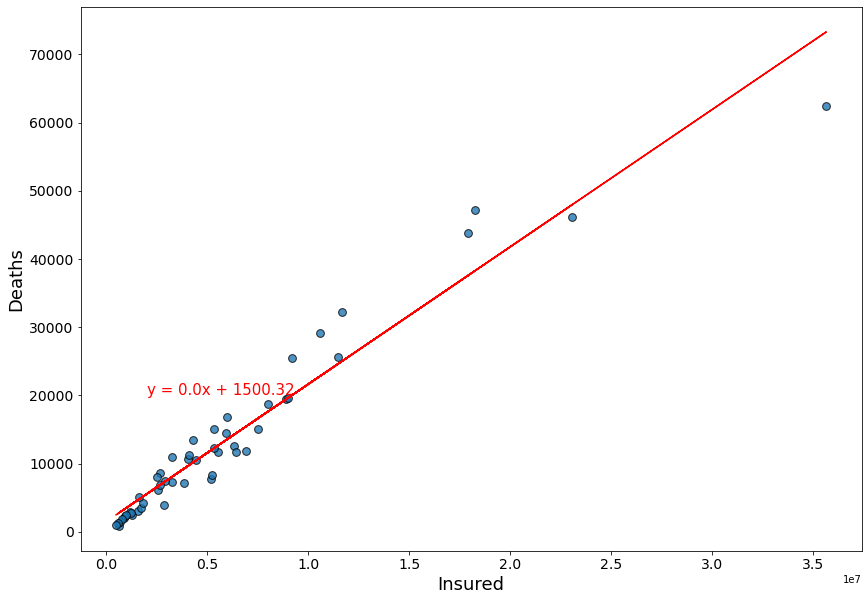

In [230]:
# Linear regression on Insured vs Disease Mortaility count
x_values= state_heart_decease_df["Insured"]
y_values= state_heart_decease_df["Deaths"]
xlabel='Insured'
ylabel='Deaths'
lnr_fn(x_values, y_values,2000000,20000)


The rvalue is: -0.07679279404684557
The r-squared is: 0.00589713321752124
The Slope is: -3.4126590682258483e-07
The Intercept is: 165.66224306439128
The pvalue is: 0.5960726607494027
The Std. Dev. is: 6.39539655409053e-07


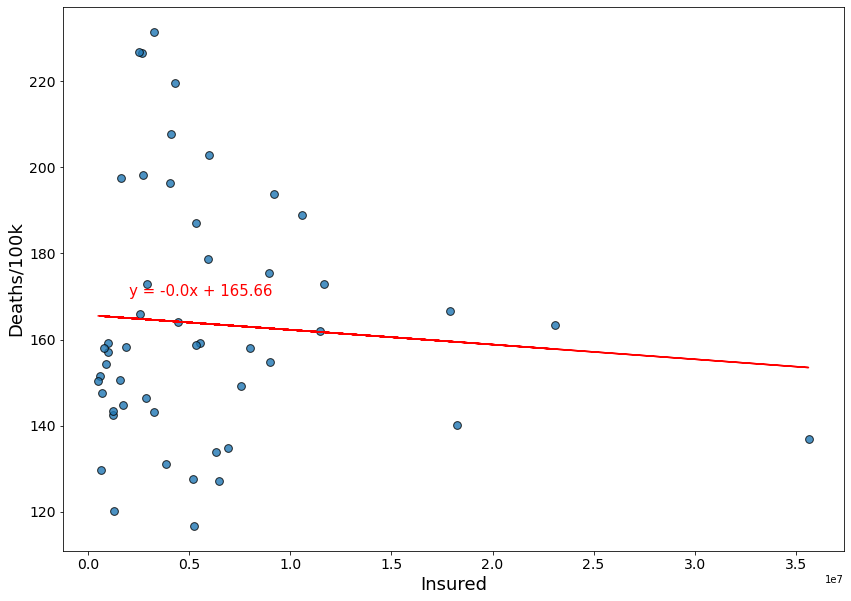

In [231]:
# Linear regression on Insured vs Disease Mortaility %
x_values= state_heart_decease_df["Insured"]
y_values= state_heart_decease_df["Deaths/100k"]
xlabel='Insured'
ylabel='Deaths/100k'
lnr_fn(x_values, y_values,2000000,170)
# Save the figure